In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [7]:
labels = ['hnot', 'hone']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [56]:
train = get_data('F:/datasetgnu/training')
val = get_data('F:/datasetgnu/validation')

test1=get_data('F:/datasetgnu/test1')
test2=get_data('F:/datasetgnu/test2')

<ipython-input-7-9fd6dc0c4043>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'F:/datasetgnu/test1\\hnot'

c:\users\priya\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

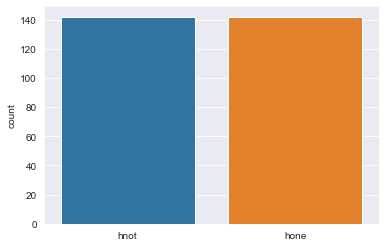

In [11]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("hnot")
    else:
        l.append("hone")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'hnot')

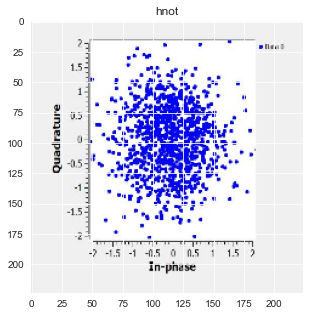

In [12]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'hone')

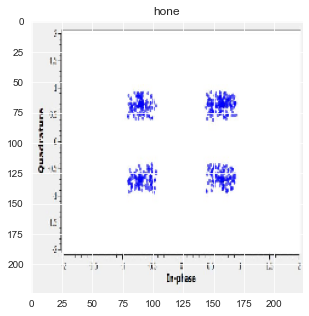

In [13]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [14]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [16]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [17]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [18]:
history = model.fit(x_train,y_train,epochs = 10 , validation_data = (x_val, y_val))

Epoch 1/10
9/9 [==============================] - 76s 7s/step - loss: 0.6707 - accuracy: 0.6160 - val_loss: 0.6610 - val_accuracy: 0.5000
Epoch 2/10
9/9 [==============================] - 59s 7s/step - loss: 0.6661 - accuracy: 0.6194 - val_loss: 0.6471 - val_accuracy: 0.5211
Epoch 3/10
9/9 [==============================] - 35s 4s/step - loss: 0.6511 - accuracy: 0.6621 - val_loss: 0.6338 - val_accuracy: 0.5352
Epoch 4/10
9/9 [==============================] - 21s 2s/step - loss: 0.6346 - accuracy: 0.7315 - val_loss: 0.6203 - val_accuracy: 0.8169
Epoch 5/10
9/9 [==============================] - 20s 2s/step - loss: 0.6325 - accuracy: 0.7323 - val_loss: 0.6061 - val_accuracy: 0.9965
Epoch 6/10
9/9 [==============================] - 20s 2s/step - loss: 0.6165 - accuracy: 0.7831 - val_loss: 0.5915 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 20s 2s/step - loss: 0.6019 - accuracy: 0.8899 - val_loss: 0.5776 - val_accuracy: 1.0000
Epoch 8/10
9/9 [==================

In [19]:
history.history

{'loss': [0.6679385304450989,
  0.6619356870651245,
  0.6523414254188538,
  0.6323903203010559,
  0.627278745174408,
  0.6126079559326172,
  0.5994694232940674,
  0.5962598919868469,
  0.5696685910224915,
  0.5754003524780273],
 'accuracy': [0.6232394576072693,
  0.6408450603485107,
  0.6795774698257446,
  0.73591548204422,
  0.7535211443901062,
  0.8063380122184753,
  0.8697183132171631,
  0.9014084339141846,
  0.9295774698257446,
  0.9154929518699646],
 'val_loss': [0.6609755754470825,
  0.6470849514007568,
  0.6337527632713318,
  0.6202967166900635,
  0.6060858964920044,
  0.591484785079956,
  0.5776004195213318,
  0.5644168257713318,
  0.5514853000640869,
  0.5392698049545288],
 'val_accuracy': [0.5,
  0.5211267471313477,
  0.5352112650871277,
  0.8169013857841492,
  0.9964788556098938,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

In [20]:
history.history.keys()
dict_keys=(['loss','accuracy'])

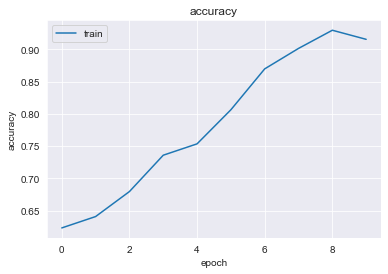

In [21]:
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

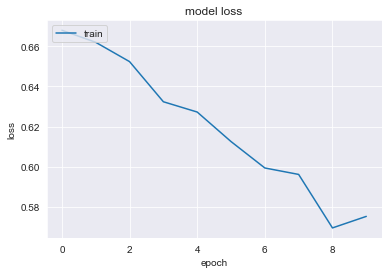

In [22]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

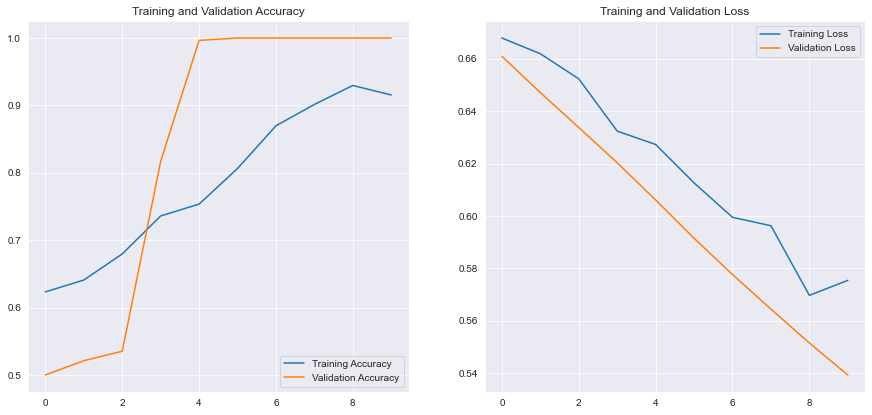

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['hnot (Class 0)','hone (Class 1)']))

TypeError: 'numpy.ndarray' object is not callable

Class:  0


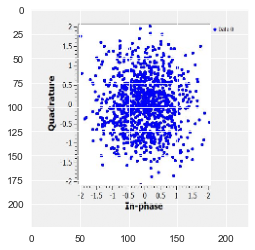

In [69]:
img = x_val[130]
plt.imshow(x_val[130])
test_img = tf.reshape(img, [1,224,224,3])
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)